## Jet Analysis(Nuclear Modification Factor)( $R_{\mathrm{AA}}$)

# Preparations
Please set path of jet data files for both pp and PbPb.
Also if you use jet cone size different from $R=0.4$, please change the value jetR below.

# Loading all the files

In [12]:
# Set File Paths
# Please set the path for pp jet data file
file_pp = '../data/pp19_30-40/pp19_30-40_merge_sel_48412.dat'

# Please set the value of jet cone size you used in the jet reconstruction
jetR = 0.4


In [13]:
# Please set the path for pbpb jet data file
file_pbpb = '../data/final1012/om_final_alphas_30-40/om_final_alphas_30-40_merge_12k.dat'

In [14]:
# preperations
import numpy as np
import matplotlib.pyplot as plt

# pi and 2pi 
pi = 3.1415926
twopi = 2.0*pi

# define plot style
width = 0.05
plotMarkerSize = 8
labelfontsize = 15
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [7.5, 5.5]
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.8
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.8
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = "in"
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['legend.numpoints'] = 1
mpl.rcParams['font.size'] = 15
mpl.rcParams['savefig.format'] = "pdf"

In [15]:
def ratio_error(v1,e1,v2,e2):
  #v1, e1: numerator value and error
  #v2, e2: denominator value and error  
  error1 = e1/v2
  error2 = (e2/v2)*(v1/v2)
  error = np.sqrt(error1*error1+error2*error2)
  return error

In [16]:
# Load files
data_pp = np.loadtxt(file_pp, delimiter=',')
data_pbpb = np.loadtxt(file_pbpb, delimiter=',')

# Indices of the data array
i_pp = data_pp[:,0] 
i_pbpb = data_pbpb[:,0] 

# Get Indices of jets in the data array
jet_id_pp = np.where(i_pp < 0.1)
jet_id_pbpb = np.where(i_pbpb < 0.1)

# Extract jets
jets_pp = data_pp[jet_id_pp]
jets_pbpb = data_pbpb[jet_id_pbpb]

# Extract associated charged particles for pp
assoc_pp= []
for i in range(len(jet_id_pp[0])-1):
  chunck = data_pp[jet_id_pp[0][i]+1:jet_id_pp[0][i+1]]
  assoc_pp.append(chunck)
chunck = data_pp[jet_id_pp[0][-1]+1:]
assoc_pp.append(chunck)

# Extract associated charged particles for pbpb
assoc_pbpb= []
for i in range(len(jet_id_pbpb[0])-1):
  chunck = data_pbpb[jet_id_pbpb[0][i]+1:jet_id_pbpb[0][i+1]]
  assoc_pbpb.append(chunck)
chunck = data_pbpb[jet_id_pbpb[0][-1]+1:]
assoc_pbpb.append(chunck)

# p-p jet-spectra

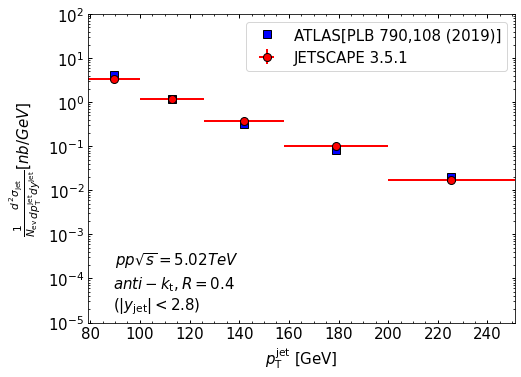

In [17]:
# Prepare arrays of Jet-pT
jet_pt_pp_in = jets_pp[:,1]

#No. of events selected
n_ev_pp = 48412

# bin settings
pt_min = 79
pt_max = 251
bins_11 = [79,100,126,158,200,251]
y_axis11 = [4.051,1.1543,0.3131,0.08267,0.02019]

# Fill Histogram
n_pp, pt = np.histogram(jet_pt_pp_in, bins=bins_11 )

# Statistical Errors
err_n_pp = np.sqrt(n_pp)

# bin width
dpt = (pt[1:]-pt[:-1])
# bin center
pt = pt[0:-1] + 0.5*dpt

# Jet Spectrum (Sigma in nb)
sigma = 519.9
d_eta = 2.8*2
dn_dpt_pp = (n_pp*sigma)/n_ev_pp/dpt/d_eta

# Errors 
err_dn_dpt_pp = (err_n_pp*sigma)/n_ev_pp/dpt/d_eta

# Generate Plots
fig = plt.figure()

#plt.errorbar(pt, dn_dpt_pp, fmt='o', label="pp",
             #xerr=0.5*dpt, yerr=err_dn_dpt_pp, color='red')

plt.errorbar(pt, y_axis11,ms=8,mec='black', fmt='s', label="ATLAS[PLB 790,108 (2019)]",
             xerr=None, yerr=None, color='blue')

plt.errorbar(pt,dn_dpt_pp,ms=8,mec='black',fmt='o',label="JETSCAPE 3.5.1",
             xerr=0.5*dpt, yerr=err_dn_dpt_pp,color ='red')

#axes setting
plt.yscale('log')
plt.legend(loc=0)
plt.xlabel(r"$p^{\mathrm{jet}}_{\mathrm{T}}$ [GeV]")
plt.ylabel(r"$\frac{1}{N_{\mathrm{ev}}}\frac{d^{\mathrm{2}}\sigma_{\mathrm{jet}}}{dp^{\mathrm{jet}}_{\mathrm{T}}dy^{\mathrm{jet}}}[nb/GeV]$")
plt.xlim(pt_min,pt_max)
y_min = 0.00001
y_max = 100

plt.ylim(y_min,y_max)
plt.text(pt_min+11,y_min*20, r'$pp$' r"$ \sqrt{s}= 5.02 TeV$")
plt.text(pt_min+10,y_min*6,r'$anti-k_{\mathrm{t}},R=0.4$')
plt.text(pt_min+10,y_min*2,r"$(|y_{\mathrm{jet}}|<2.8)$")

# save plots
plt.tight_layout()
plt.savefig('pp_spectra')


# p-p jet-spectra ratio with ATLAS

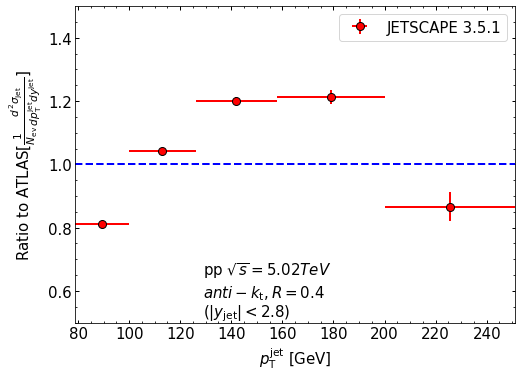

In [18]:
# Generate Plots
fig = plt.figure()

# Calculate RAA and error
ratio11 = dn_dpt_pp/y_axis11
error_ratio11 = err_dn_dpt_pp/dn_dpt_pp
#error_raa = ratio_error(dn_dpt_pp,err_dn_dpt_pp,dn_dpt_pp,err_dn_dpt_pp)

plt.errorbar(pt, ratio11, ms=8,mec='black',fmt='o', label="JETSCAPE 3.5.1",
             xerr=0.5*dpt, yerr=error_ratio11, color='red')


#axes setting
plt.legend(loc=0)
plt.xlabel(r"$p^{\mathrm{jet}}_{\mathrm{T}}$ [GeV]")
plt.ylabel("Ratio to ATLAS" r"$[\frac{1}{N_{\mathrm{ev}}}\frac{d^{\mathrm{2}}\sigma_{\mathrm{jet}}}{dp^{\mathrm{jet}}_{\mathrm{T}}dy^{\mathrm{jet}}}]$")
plt.xlim(pt_min,pt_max)
plt.ylim(0.5,1.5)
plt.legend(loc=0)
#plt.text(pt_min+100,0.76, 'vir=0.5')
plt.axhline(1, color = "blue", linestyle="dashed", linewidth=2.0) 
plt.text(pt_min+50,0.65, r'pp ' r"$\sqrt{s}= 5.02 TeV$")
plt.text(pt_min+50,0.58,r'$anti-k_{\mathrm{t}},R=0.4$')
plt.text(pt_min+50,0.52,r"$(|y_{\mathrm{jet}}|<2.8)$")


# save plot to the Desktop
plt.tight_layout()
plt.savefig('Ratio_to_ATLAS(pp)')

# Pb-Pb jet-spectra

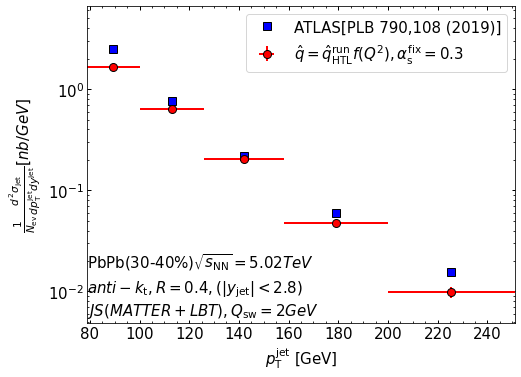

In [19]:
# Prepare arrays of Jet-pT
jet_pt_pbpb_in = jets_pbpb[:,1]

#No. of analyzed events
n_ev_pbpb = 12000

# bin settings
pt_min = 79
pt_max = 251
bins_12 = [79,100,126,158,200,251]
y_axis12 = [2.475,0.757,0.2186,0.0603,0.01541]

# Fill Histogram
n_pbpb, pt = np.histogram(jet_pt_pbpb_in, bins=bins_12 )

# Statistical Errors
err_n_pbpb = np.sqrt(n_pbpb)

# bin width
dpt = (pt[1:]-pt[:-1])
# bin center
pt = pt[0:-1] + 0.5*dpt

# Jet Spectrum 
dn_dpt_pbpb = (n_pbpb*sigma)/n_ev_pbpb/dpt/d_eta

# Errors 
err_dn_dpt_pbpb = (err_n_pbpb*sigma)/n_ev_pbpb/dpt/d_eta

# Generate Plots
fig = plt.figure()

plt.errorbar(pt, y_axis12,ms=8,mec='black', fmt='s', label="ATLAS[PLB 790,108 (2019)]",
             xerr=None, yerr=None, color='blue')

plt.errorbar(pt, dn_dpt_pbpb,ms=8,mec='black', fmt='o', label=r"$\hat{q}=\hat{q}^{\mathrm{run}}_{\mathrm{HTL}}f(Q^{\mathrm{2}}),\alpha^{\mathrm{fix}}_{\mathrm{s}}=0.3$",
             xerr=0.5*dpt, yerr=err_dn_dpt_pbpb, color='red')

#axes setting
plt.yscale('log')
plt.legend(loc=0)
plt.xlabel(r"$p^{\mathrm{jet}}_{\mathrm{T}}$ [GeV]")
plt.ylabel(r"$\frac{1}{N_{\mathrm{ev}}}\frac{d^{\mathrm{2}}\sigma_{\mathrm{jet}}}{dp^{\mathrm{jet}}_{\mathrm{T}}dy^{\mathrm{jet}}}[nb/GeV]$")
plt.xlim(pt_min,pt_max)
y_min = dn_dpt_pbpb[-1]*0.5
if y_min < 0:
  y_min = 0.0015

y_max = (dn_dpt_pp[0]+err_dn_dpt_pp[0])*2.0
plt.ylim(y_min,y_max)
plt.text(pt_min,y_min*3.5, r"PbPb(30-40%)"r"$\sqrt{s_{\mathrm{NN}}}=5.02 TeV$")
plt.text(pt_min,y_min*2.0,r'$anti-k_{\mathrm{t}},R=0.4,(|y_{\mathrm{jet}}|<2.8)$')
plt.text(pt_min,y_min*1.2,r"$JS(MATTER+LBT),Q_{\mathrm{sw}}=2GeV$")


# save plots
plt.tight_layout()
plt.savefig('PbPb_spectra')


# Pb-Pb jet-spectra ratio with ATLAS

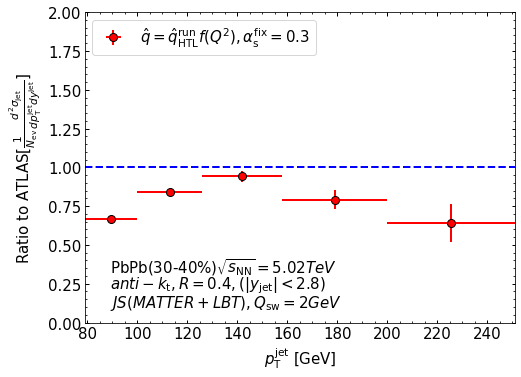

In [20]:
# Generate Plots
fig = plt.figure()

# Calculate Ratio and error
ratio12 = dn_dpt_pbpb/y_axis12
error_ratio12 = err_dn_dpt_pbpb/dn_dpt_pbpb

plt.errorbar(pt, ratio12,ms=8,mec='black', fmt='o', label=r"$\hat{q}=\hat{q}^{\mathrm{run}}_{\mathrm{HTL}}f(Q^{\mathrm{2}}),\alpha^{\mathrm{fix}}_{\mathrm{s}}=0.3$",
             xerr=0.5*dpt, yerr=error_ratio12, color='red')


#axes setting
plt.legend(loc='upper left')
plt.xlabel(r"$p^{\mathrm{jet}}_{\mathrm{T}}$ [GeV]")
plt.ylabel("Ratio to ATLAS" r"$[\frac{1}{N_{\mathrm{ev}}}\frac{d^{\mathrm{2}}\sigma_{\mathrm{jet}}}{dp^{\mathrm{jet}}_{\mathrm{T}}dy^{\mathrm{jet}}}]$")
plt.xlim(pt_min,pt_max)
plt.ylim(0.0,2.0)
plt.axhline(1, color = "blue", linestyle="dashed", linewidth=2.0) 
plt.text(pt_min+10,0.32, r"PbPb(30-40%)"r"$\sqrt{s_{\mathrm{NN}}}=5.02 TeV$")
plt.text(pt_min+10,0.22,r'$anti-k_{\mathrm{t}},R=0.4,(|y_{\mathrm{jet}}|<2.8)$')
plt.text(pt_min+10,0.1,r"$JS(MATTER+LBT),Q_{\mathrm{sw}}=2GeV$")


# save plot to the Desktop
plt.tight_layout()
plt.savefig('Ratio_to_ATLAS(PbPb)')

## Jet-$R_{\mathrm{AA}}$

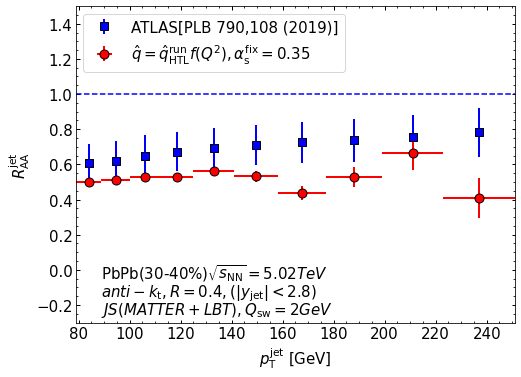

In [21]:
bins_13 = [79,89,100,112,125,141,158,177,199,223,251]
y_axis13= [0.606,0.620,0.647,0.672,0.692,0.711,0.725,0.737,0.754,0.782]
yerror_13 = [0.1124,0.1144,0.1194,0.1126,0.1126,0.1138,0.1158,0.1218,0.128,0.14]

# Fill Histogram
n_pp, pt = np.histogram(jet_pt_pp_in, bins= bins_13 )
n_pbpb, pt = np.histogram(jet_pt_pbpb_in, bins= bins_13 )

# Statistical Errors
err_n_pp = np.sqrt(n_pp)
err_n_pbpb = np.sqrt(n_pbpb)

# bin width
dpt = (pt[1:]-pt[:-1])
# bin center
pt = pt[0:-1] + 0.5*dpt

# Jet Spectrum
dn_dpt_pp = (n_pp*sigma)/n_ev_pp/dpt/d_eta
dn_dpt_pbpb = (n_pbpb*sigma)/n_ev_pbpb/dpt/d_eta

# Errors 
err_dn_dpt_pp = (err_n_pp*sigma)/n_ev_pp/dpt/d_eta
err_dn_dpt_pbpb = (err_n_pbpb*sigma)/n_ev_pbpb/dpt/d_eta

# Generate Plots
fig = plt.figure()

# Calculate RAA and error
raa =  dn_dpt_pbpb/dn_dpt_pp
error_raa = ratio_error(dn_dpt_pbpb,err_dn_dpt_pbpb,dn_dpt_pp,err_dn_dpt_pp)

plt.errorbar(pt, y_axis13,ms=8,mec='black', fmt= 's',label="ATLAS[PLB 790,108 (2019)]",
            xerr=None, yerr=yerror_13, color='blue')

plt.errorbar(pt, raa, ms=9,mec='black',fmt='o', label=r"$\hat{q}=\hat{q}^{\mathrm{run}}_{\mathrm{HTL}}f(Q^{\mathrm{2}}),\alpha^{\mathrm{fix}}_{\mathrm{s}}=0.35$",
             xerr=0.5*dpt, yerr=error_raa, color='red')



#axes setting
plt.legend(loc='upper left')
plt.xlabel(r"$p^{\mathrm{jet}}_{\mathrm{T}}$ [GeV]")
plt.ylabel(r"$R^{\mathrm{jet}}_{\mathrm{AA}}$")
plt.xlim(pt_min,pt_max)
plt.ylim(-0.3,1.5)
plt.axhline(1, color = "blue", linestyle="dashed", linewidth=1.5) 
plt.text(pt_min+10,-0.05, r"PbPb(30-40%)"r"$\sqrt{s_{\mathrm{NN}}}=5.02 TeV$")
plt.text(pt_min+10,-0.15,r'$anti-k_{\mathrm{t}},R=0.4,(|y_{\mathrm{jet}}|<2.8)$')
plt.text(pt_min+10,-0.25,r"$JS(MATTER+LBT),Q_{\mathrm{sw}}=2GeV$")

# save plot to the Desktop
plt.tight_layout()
plt.savefig('Raa')

## Jet-$R_{\mathrm{AA}}$ ratio with ATLAS

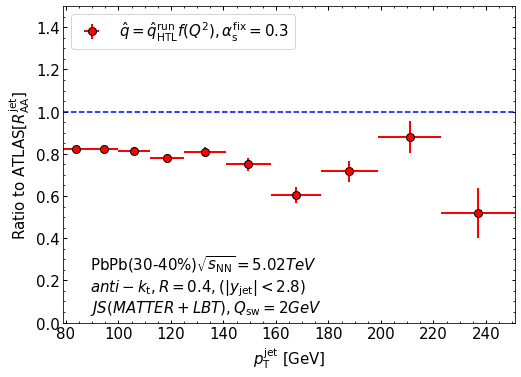

In [22]:
# Generate Plots
fig = plt.figure()

# Calculate RAA and error
ratio14 = raa/y_axis13
error_raa = ratio_error(dn_dpt_pp,err_dn_dpt_pp,dn_dpt_pp,err_dn_dpt_pp)

plt.errorbar(pt, ratio14,ms=8,mec='black', fmt='o', label= r"$\hat{q}=\hat{q}^{\mathrm{run}}_{\mathrm{HTL}}f(Q^{\mathrm{2}}),\alpha^{\mathrm{fix}}_{\mathrm{s}}=0.3$",
             xerr=0.5*dpt, yerr=error_raa, color='red')


#axes setting
plt.xlabel(r"$p^{\mathrm{jet}}_{\mathrm{T}}$ [GeV]")
plt.ylabel("Ratio to ATLAS" r"$[R^{\mathrm{jet}}_{\mathrm{AA}}]$")
plt.xlim(pt_min,pt_max)
plt.ylim(0.0,1.5)
plt.legend(loc='upper left')
plt.axhline(1, color = "blue", linestyle="dashed", linewidth=1.5) 
plt.text(pt_min+10,0.25, r"PbPb(30-40%)"r"$\sqrt{s_{\mathrm{NN}}}=5.02 TeV$")
plt.text(pt_min+10,0.15,r'$anti-k_{\mathrm{t}},R=0.4,(|y_{\mathrm{jet}}|<2.8)$')
plt.text(pt_min+10,0.05,r"$JS(MATTER+LBT),Q_{\mathrm{sw}}=2GeV$")

# save plot to the Desktop
plt.tight_layout()
plt.savefig('Ratio_to_ATLAS(Raa)')